# Amygdala single cell templates
## This notebook contains the major cells types present in the amygdala along with code to generate the passive properties, current injections, and FI curves for each cell. Also present in this notebook is the bio data in which these template cells were constrained from.

Download the project directory, the packages needed to run the code and compile the mechanisms.

In [1]:

RunningInCOLAB = 'google.colab' in str(get_ipython())
if RunningInCOLAB:
  !rm -rf ./Amygdala-Cells
  !git clone https://github.com/GregGlickert/Amygdala-Cells &> /dev/null
  !pip install --upgrade bmtool neuron &> /dev/null
  !cd ./Amygdala-Cells/mechanisms && nrnivmodl modfiles &> /dev/null
  %cd Amygdala-Cells/
else:
  !cd ./mechanisms && nrnivmodl modfiles &> /dev/null


/content/Amygdala-Cells


This section of code is run through a subprocess. Once neuron loads a hoc template file there is no reloading. By creating a subprocess Neuron is isolated and closes after running.

This allows for conductance changes to the `Amygdala/feng.hoc` and `Amygdala/som.hoc` files.

Sources for everything can be found when running each plot the all of the above doesnt really have sources as it was harder to make look nice. If you want the most detail run each thing separtely.


Mechanisms already loaded from path: mechanisms.  Aborting.
Injection location: Cell_Cf[0].soma[0](0.5)
Recording: Cell_Cf[0].soma[0](0.5)._ref_v
Running simulation for passive properties...

V Rest: -70.28 (mV)
Resistance: 128.04 (MOhms)
Membrane time constant: 31.80 (ms)

V_rest Calculation: Voltage taken at time 200.0 (ms) is
-70.28 (mV)

R_in Calculation: dV/dI = (v_final-v_rest)/(i_final-i_start)
(-83.08 - (-70.28)) / (-0.1 - 0)
12.80 (mV) / 0.1 (nA) = 128.04 (MOhms)

Tau Calculation: time until 63.2% of dV
v_rest + 0.632*(v_final-v_rest)
-70.28 + 0.632*(-83.08-(-70.28)) = -78.37 (mV)
Time where V = -78.37 (mV) is 231.80 (ms)
231.80 - 200 = 31.80 (ms)

Injection location: Cell_Cf[1].soma[0](0.5)
Recording: Cell_Cf[1].soma[0](0.5)._ref_v
Current clamp simulation running...


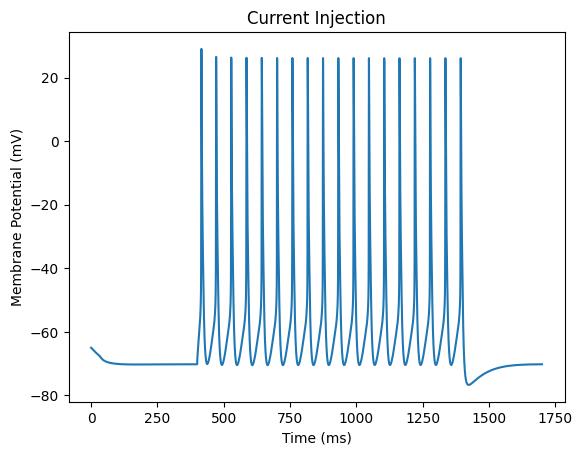

The Bio data can be found in Figure 7 of Intracellular recordings from morphologically identified neurons of the basolateral amygdala (Rainnie et al., 1993) 
https://journals.physiology.org/doi/epdf/10.1152/jn.1993.69.4.1350
Injection location: Cell_Cf[10].soma[0](0.5)
Recording: Cell_Cf[10].soma[0](0.5)._ref_v
Running simulations for FI curve...

Results
Injection (nA): 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1
Number of spikes: 0, 10, 15, 18, 20, 21, 22, 23, 25, 26, 28



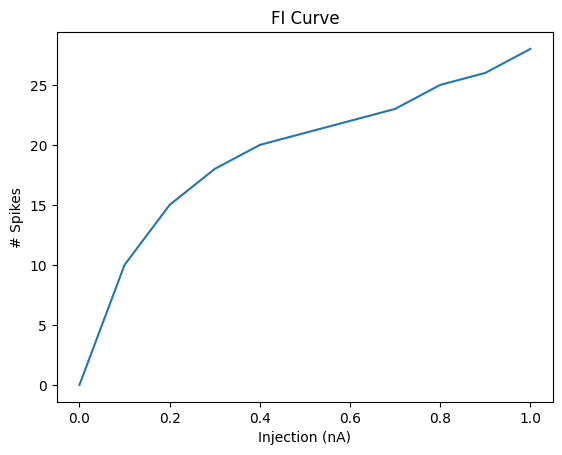

The Bio data can be found in Figure 6 of Intracellular recordings from morphologically identified neurons of the basolateral amygdala (Rainnie et al., 1993) 
https://journals.physiology.org/doi/epdf/10.1152/jn.1993.69.4.1350


In [2]:
#@title Cell template gui code
from neuron import clear_gui_callback
from multiprocessing import Process
import ipywidgets as widgets
from ipywidgets import interactive_output,HBox,VBox,Label,Layout
from IPython.display import display
from IPython.display import clear_output

# Function to be run in a subprocess
def run(Cell = None, option = None, noise = None, inj_amp = 300, inj_delay = 400, inj_dur = 1000):
    # Build a profiler object
    from bmtool.singlecell import Profiler

    profiler = Profiler(template_dir='templates',
                        mechanism_dir='mechanisms')
    if option == 'Passive properties':
      # Get passive properties for a given cell template you can change when passive properties are taken
      _,_ = profiler.passive_properties(Cell, plot=False)
      print("BIO DATA")
      if Cell == 'Cell_Af' or Cell == 'Cell_Cf':
        print("All data from (Rainnie et al., 1993) \nRMP of -65.8 plus or minus 2.9 mV \ninput resistance of 58.1 plus or minus 10 megaohms \ntau of 27.9 plus or minus 1.9 ms")

      if Cell == 'InterneuronCellf':
        print("Data can be found in Diversity of interneurons in the lateral and basal amygdala (Sah 2022) \nhttps://www.nature.com/articles/s41539-020-0071-z")

      if Cell == 'SOM_Cell':
        print("RMP of -58 plus or minus 7 mV (Kawaguchi & Kubota, 1996) \ninput resistance of 344 plus or minus 34.7 megaohms (Sosulina et al., 2010)  \ntau of 23.6 plus or minus 8.6 ms (Karagiannis et al., 2009)")

      if Cell == "CR_Cell":
        print("RMP of -64 plus or minus 7 mV (Kawaguchi & Kubota, 1996) \ninput resistance of 481 plus or minus 153 megaohms (Kawaguchi & Kubota, 1996)   \ntau of 23.9 plus or minus 10.9 ms (Porter et al., 1998) ")

    if option == 'Current Clamp':
      # Voltage trace with current clamp for a given cell template and injection strength
      if noise == True:
        time_vec, voltage_vec = profiler.current_injection(Cell, post_init_function="insert_mechs(123)", inj_amp=inj_amp, inj_delay=inj_delay, inj_dur=inj_dur,tstop=1700)
      if noise == False:
        time_vec, voltage_vec = profiler.current_injection(Cell, inj_amp=inj_amp, inj_delay=inj_delay, inj_dur=inj_dur,tstop=1700)
      if Cell == 'Cell_Af' or Cell == 'Cell_Cf':
        print("The Bio data can be found in Figure 7 of Intracellular recordings from morphologically identified neurons of the basolateral amygdala (Rainnie et al., 1993) \nhttps://journals.physiology.org/doi/epdf/10.1152/jn.1993.69.4.1350")

      if Cell == 'InterneuronCellf':
        print("The bio data can be found in Figure 1 Networks of Parvalbumin-Positive Interneurons in the Basolateral Amygdala (Woodruff and Sah 2007 \nhttps://www.jneurosci.org/content/27/3/553")
        print("The bio data is also in Figure 1 Diversity of interneurons in the lateral and basal amygdala (Sah 2022) \nhttps://www.nature.com/articles/s41539-020-0071-z")

      if Cell == 'SOM_Cell':
        print("The Bio data can be found in figure 2 of Physiological and Morphological Identification of Somatostatin- or Vasoactive Intestinal Polypeptide-Containing Cells among GABAergic Cell Subtypes in Rat Frontal Cortex\n(Kawaguchi & Kubota, 1996) https://www.jneurosci.org/content/jneuro/16/8/2701.full.pdf")
        print("The bio data can also be found in figure 3 of GABAergic Cell Subtypes and their Synaptic Connections in Rat Frontal Cortex (Kawaguchi & Kubota, 1997) \n https://doi.org/10.1093/cercor/7.6.476")

      if Cell == 'CR_Cell':
        print("The bio data is found in Figure 2 of Interneurons in the basolateral amygdala (Polepalli, & Sah, 2011) \nhttps://www.sciencedirect.com/science/article/pii/S0028390810003059?via%3Dihub \n There is also lots data in table 1 for all interneurons! ")

    if option == 'FI curve':
      # FI curve given a cell
      if noise == True:
        amp_vec, spike_vec = profiler.fi_curve(Cell, post_init_function="insert_mechs(123)")
      if noise == False:
        amp_vec, spike_vec = profiler.fi_curve(Cell)
      if Cell == 'Cell_Af' or Cell == 'Cell_Cf':
        print("The Bio data can be found in Figure 6 of Intracellular recordings from morphologically identified neurons of the basolateral amygdala (Rainnie et al., 1993) \nhttps://journals.physiology.org/doi/epdf/10.1152/jn.1993.69.4.1350")
      if Cell == 'InterneuronCellf':
        print("The bio data can be found in Figure 1 Networks of Parvalbumin-Positive Interneurons in the Basolateral Amygdala (Woodruff and Sah 2007 \nhttps://www.jneurosci.org/content/27/3/553")
        print("The bio data is also in Figure 1 Diversity of interneurons in the lateral and basal amygdala (Sah 2022) \nhttps://www.nature.com/articles/s41539-020-0071-z")

      if Cell == 'SOM_Cell':
        print("The Bio data can be found in figure 2 of Physiological and Morphological Identification of Somatostatin- or Vasoactive Intestinal Polypeptide-Containing Cells among GABAergic Cell Subtypes in Rat Frontal Cortex\n(Kawaguchi & Kubota, 1996) https://www.jneurosci.org/content/jneuro/16/8/2701.full.pdf")
        print("The bio data can also be found in figure 3 of GABAergic Cell Subtypes and their Synaptic Connections in Rat Frontal Cortex (Kawaguchi & Kubota, 1997) \n https://doi.org/10.1093/cercor/7.6.476")

      if Cell == 'CR_Cell':
        print("The bio data is found in Figure 2 of Interneurons in the basolateral amygdala (Polepalli, & Sah, 2011) \nhttps://www.sciencedirect.com/science/article/pii/S0028390810003059?via%3Dihub \n There is also lots data in table 1 for all interneurons! ")
    if option == 'All of the above':
      _,_ = profiler.passive_properties(Cell,plot=False)
      if noise == True:
        time_vec, voltage_vec = profiler.current_injection(Cell, post_init_function="insert_mechs(123)", inj_amp=inj_amp, inj_delay=inj_delay, inj_dur=inj_dur,tstop=1700)
        if Cell == 'Cell_Af' or Cell == 'Cell_Cf':
          print("The Bio data can be found in Figure 7 of Intracellular recordings from morphologically identified neurons of the basolateral amygdala (Rainnie et al., 1993) \nhttps://journals.physiology.org/doi/epdf/10.1152/jn.1993.69.4.1350")
        amp_vec, spike_vec = profiler.fi_curve(Cell, post_init_function="insert_mechs(123)")
        if Cell == 'Cell_Af' or Cell == 'Cell_Cf':
          print("The Bio data can be found in Figure 6 of Intracellular recordings from morphologically identified neurons of the basolateral amygdala (Rainnie et al., 1993) \nhttps://journals.physiology.org/doi/epdf/10.1152/jn.1993.69.4.1350")
      if noise == False:
        time_vec, voltage_vec = profiler.current_injection(Cell, inj_amp=inj_amp, inj_delay=inj_delay, inj_dur=inj_dur,tstop=1700)
        if Cell == 'Cell_Af' or Cell == 'Cell_Cf':
          print("The Bio data can be found in Figure 7 of Intracellular recordings from morphologically identified neurons of the basolateral amygdala (Rainnie et al., 1993) \nhttps://journals.physiology.org/doi/epdf/10.1152/jn.1993.69.4.1350")
        amp_vec, spike_vec = profiler.fi_curve(Cell)
        if Cell == 'Cell_Af' or Cell == 'Cell_Cf':
          print("The Bio data can be found in Figure 6 of Intracellular recordings from morphologically identified neurons of the basolateral amygdala (Rainnie et al., 1993) \nhttps://journals.physiology.org/doi/epdf/10.1152/jn.1993.69.4.1350")
      if Cell == 'InterneuronCellf':
          print("The bio data can be found in Figure 1 Networks of Parvalbumin-Positive Interneurons in the Basolateral Amygdala (Woodruff and Sah 2007 \nhttps://www.jneurosci.org/content/27/3/553")
          print("The bio data is also in Figure 1 Diversity of interneurons in the lateral and basal amygdala (Sah 2022) \nhttps://www.nature.com/articles/s41539-020-0071-z")

      if Cell == 'SOM_Cell':
        print("The Bio data can be found in figure 2 of Physiological and Morphological Identification of Somatostatin- or Vasoactive Intestinal Polypeptide-Containing Cells among GABAergic Cell Subtypes in Rat Frontal Cortex\n(Kawaguchi & Kubota, 1996) https://www.jneurosci.org/content/jneuro/16/8/2701.full.pdf")
        print("The bio data can also be found in figure 3 of GABAergic Cell Subtypes and their Synaptic Connections in Rat Frontal Cortex (Kawaguchi & Kubota, 1997) \n https://doi.org/10.1093/cercor/7.6.476")

      if Cell == 'CR_Cell':
        print("The bio data is found in Figure 2 of Interneurons in the basolateral amygdala (Polepalli, & Sah, 2011) \nhttps://www.sciencedirect.com/science/article/pii/S0028390810003059?via%3Dihub \n There is also lots data in table 1 for all interneurons! ")

# runs the profiler without using the current clamp settings
def run_profiler(btn):
  clear_output()
  Cell = cell_select.value
  plot = plot_select.value
  Noise = noise.value
  p = Process(target=run(Cell=Cell, option=plot, noise = Noise))
  p.start()
  p.join()
  display(ui)

# runs the profiler using current clamp setting get separte to have everything look nicer
def run_profiler_clamp(btn):
  clear_output()
  Cell = cell_select.value
  plot = plot_select.value
  Noise = noise.value
  inj_amp = current_amp.value
  inj_dur = current_dur.value
  inj_delay = current_delay.value
  p = Process(target=run(Cell=Cell, option=plot, noise = Noise, inj_amp = inj_amp, inj_delay = inj_delay, inj_dur = inj_dur))
  p.start()
  p.join()
  display(ui)

def current_settings(btn):
  run_clamp = widgets.Button(description="run clamp!",icon='history',button_style='primary')
  current_ui = HBox([current_amp, current_dur, current_delay, run_clamp])
  run_clamp.on_click(run_profiler_clamp)
  display(current_ui)

# core widgets
cell_select = widgets.RadioButtons(options=['Cell_Af', 'Cell_Cf', 'InterneuronCellf', 'SOM_Cell', 'CR_Cell'],value='Cell_Af',description='Cell:',disabled=False)
plot_select = widgets.RadioButtons(options=['Passive properties', 'Current Clamp', 'FI curve', 'All of the above'],value='Passive properties',description='Plot:',disabled=False)
show = widgets.Button(description="Show result",icon='history',button_style='primary')
current_clamp_adv = widgets.Button(description="Clamp Settings",icon='history',button_style='primary')
noise = widgets.Checkbox(value=False,description='Check to add noise to cell',disabled=False,indent=False)

#current clamp widgets
current_amp = widgets.BoundedFloatText(value=300,min=-200,max=500.0,step=50,description='Current (pA)',disabled=False)
current_dur = widgets.BoundedFloatText(value=1000,min=0,max=1500,step=100,description='Duration',disabled=False)
current_delay = widgets.BoundedFloatText(value=400,min=0,max=1000,step=100,description='Delay',disabled=False)


show.on_click(run_profiler)
current_clamp_adv.on_click(current_settings)
ui = HBox([cell_select, plot_select, noise, VBox([show,current_clamp_adv])])
ui



Refereneces

Karagiannis, A., Gallopin, T., Dávid, C., Battaglia, D., Geoffroy, H., Rossier, J., … Cauli, B. (2009). Classification of NPY-expressing neocortical interneurons. The Journal of Neuroscience, 29(11), 3642–3659. https://doi.org/10.1523/JNEUROSCI.0058-09.2009

Kawaguchi, Y., & Kubota, Y. (1996). Physiological and morphological identification of somatostatin- or vasoactive intestinal polypeptide-containing cells among GABAergic cell subtypes in rat frontal cortex. The Journal of Neuroscience, 16(8), 2701–2715. https://doi.org/10.1523/JNEUROSCI.16-08-02701.1996

Kawaguchi, Y., & Kubota, Y. (1997). GABAergic cell subtypes and their synaptic connections in rat frontal cortex. Cerebral Cortex, 7(6), 476–486. https://doi.org/10.1093/cercor/7.6.476

Porter, J. T., Cauli, B., Staiger, J. F., Lambolez, B., Rossier, J., & Audinat, E. (1998). Properties of bipolar VIPergic interneurons and their excitation by pyramidal neurons in the rat neocortex. European Journal of Neuroscience, 10(12), 3617–3628. https://doi.org/10.1046/j.1460-9568.1998.00367.x

Rainnie, D. G., Asprodini, E. K., & Shinnick-Gallagher, P. (1993). Intracellular recordings from morphologically identified neurons of the basolateral amygdala. Journal of Neurophysiology, 69(4), 1350–1362. https://doi.org/10.1152/jn.1993.69.4.1350

Spampanato, J., Polepalli, J., & Sah, P. (2011). Interneurons in the basolateral amygdala. Neuropharmacology, 60(5), 765–773. https://doi.org/https://doi.org/10.1016/j.neuropharm.2010.11.006

Woodruff, A. R., & Sah, P. (2007). Networks of parvalbumin-positive interneurons in the basolateral amygdala. The Journal of Neuroscience, 27(3), 553–563. https://doi.org/10.1523/JNEUROSCI.3686-06.2007